In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

In [2]:
apple = yf.Ticker("AAPL")
# del apple_data
apple_data = apple.history(start='2023-01-01', end='2024-01-01')
apple_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0
2023-01-04 00:00:00-05:00,125.853175,127.608717,124.057967,125.327507,89113600,0.0,0.0
2023-01-05 00:00:00-05:00,126.091203,126.725973,123.740574,123.998444,80962700,0.0,0.0
2023-01-06 00:00:00-05:00,124.980357,129.225376,123.869506,128.560852,87754700,0.0,0.0
2023-01-09 00:00:00-05:00,129.403925,132.319905,128.828663,129.086533,70790800,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0
2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0
2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0


<Axes: xlabel='Date'>

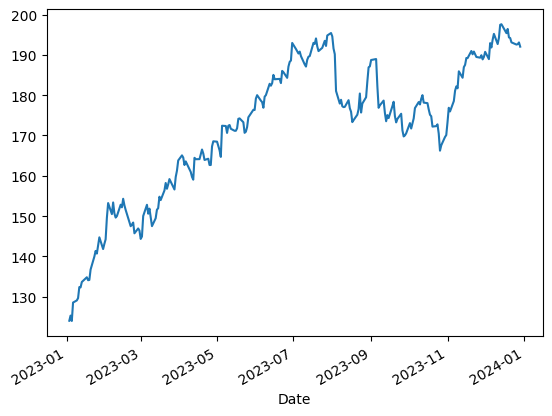

In [3]:
apple_data.Close.plot()

In [5]:
del model
model = auto_arima(apple_data['Close'].diff()[1:], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1083.983, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1084.523, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1084.503, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1086.118, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1081.839, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1082.912, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1082.872, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1084.300, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.139 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  249
Model:                        SARIMAX   Log Likelihood                -538.919
Date:                Wed, 29 May 2024   AIC           

In [12]:
# del model
model = auto_arima(apple_data['Close'].diff()[1:], trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1088.246, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1081.838, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1082.911, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1082.872, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1083.983, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1084.300, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.127 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  249
Model:                        SARIMAX   Log Likelihood                -538.919
Date:                Wed, 29 May 2024   AIC                           1081.838
Time:                        07:21:03   BIC                           1088.873
Sample:                             0   HQIC                          1084.670
          

In [5]:
model = auto_arima(apple_data['Close'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1147.371, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3326.533, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1145.367, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1143.377, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1133.104, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1521.941, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1134.497, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1134.293, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1134.942, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1781.859, Time=0

In [8]:
del model
model = ARIMA(np.array(apple_data['Close']), order=(2, 0, 0))#, seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

In [9]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -544.945
Date:                Wed, 29 May 2024   AIC                           1097.891
Time:                        07:37:43   BIC                           1111.977
Sample:                             0   HQIC                          1103.560
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        161.8501     22.090      7.327      0.000     118.554     205.146
ar.L1          1.0757      0.064     16.729      0.000       0.950       1.202
ar.L2         -0.0787      0.064     -1.238      0.216      -0.203       0.046
sigma2         4.4853      0.315     14.226      0.000       3.867       5.103
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                29.84
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.21
Prob(H) (two-sided):                  0.70   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
model2 = ARIMA(np.array(apple_data['Close']), order=(0, 0, 0))#, seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_fit2 = model2.fit()
model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:                          ARIMA   Log Likelihood               -1069.185
Date:                Wed, 29 May 2024   AIC                           2142.370
Time:                        07:38:14   BIC                           2149.413
Sample:                             0   HQIC                          2145.205
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        171.6689      1.296    132.500      0.000     169.130     174.208
sigma2       303.5734     33.916      8.951      0.000     237.099     370.048
===================================================================================
Ljung-Box (L1) (Q):                 240.48   Jarque-Bera (JB):                20.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
del model, model_fit
model = ARIMA(np.array(apple_data['Close']), order=(2, 1, 0))#, seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -540.261
Date:                Wed, 29 May 2024   AIC                           1086.521
Time:                        07:47:21   BIC                           1097.073
Sample:                             0   HQIC                          1090.769
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0766      0.064      1.202      0.229      -0.048       0.202
ar.L2         -0.0030      0.070     -0.043      0.965      -0.139       0.133
sigma2         4.4886      0.306     14.673      0.000       3.889       5.088
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                32.33
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.22
Prob(H) (two-sided):                  0.72   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
apple_data["Missing"] = apple_data.Close
apple_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Missing
Date,,,,,,,,
2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042
2023-01-04 00:00:00-05:00,125.853175,127.608717,124.057967,125.327507,89113600,0.0,0.0,125.327507
2023-01-05 00:00:00-05:00,126.091203,126.725973,123.740574,123.998444,80962700,0.0,0.0,123.998444
2023-01-06 00:00:00-05:00,124.980357,129.225376,123.869506,128.560852,87754700,0.0,0.0,128.560852
2023-01-09 00:00:00-05:00,129.403925,132.319905,128.828663,129.086533,70790800,0.0,0.0,129.086533
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385
2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816
2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548


In [38]:
apple_data["Missing"].iloc[200:205] = np.nan

/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_67152/4048236383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data["Missing"].iloc[200:205] = np.nan


In [40]:
apple_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Missing
Date,,,,,,,,
2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042
2023-01-04 00:00:00-05:00,125.853175,127.608717,124.057967,125.327507,89113600,0.0,0.0,125.327507
2023-01-05 00:00:00-05:00,126.091203,126.725973,123.740574,123.998444,80962700,0.0,0.0,123.998444
2023-01-06 00:00:00-05:00,124.980357,129.225376,123.869506,128.560852,87754700,0.0,0.0,128.560852
2023-01-09 00:00:00-05:00,129.403925,132.319905,128.828663,129.086533,70790800,0.0,0.0,129.086533
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385
2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816
2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548


In [42]:
apple_data[apple_data.Missing.isna()]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Missing
Date,,,,,,,,
2023-10-19 00:00:00-04:00,175.346501,177.139413,174.499858,174.768799,59302900,0.0,0.0,NaN
2023-10-20 00:00:00-04:00,174.619379,174.728947,171.959899,172.198959,64189300,0.0,0.0,NaN
2023-10-23 00:00:00-04:00,170.236718,173.324497,169.260568,172.318481,55980100,0.0,0.0,NaN
2023-10-24 00:00:00-04:00,172.368281,172.985834,170.774578,172.756744,43816600,0.0,0.0,NaN
2023-10-25 00:00:00-04:00,171.202906,172.378250,169.977740,170.425980,57157000,0.0,0.0,NaN


<Axes: xlabel='Date'>

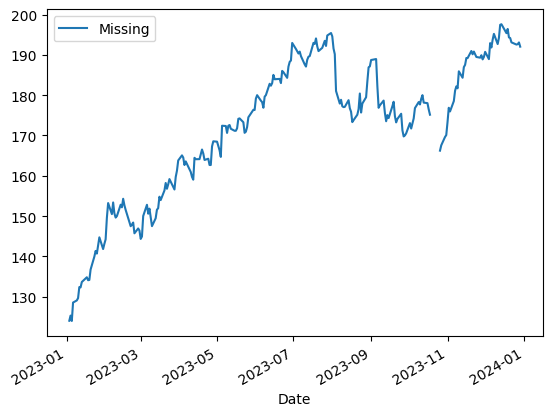

In [46]:
apple_data[["Missing"]].plot()

<Axes: xlabel='Date'>

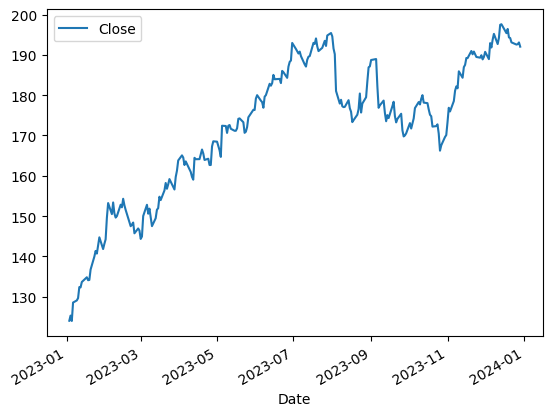

In [47]:
apple_data[["Close"]].plot()

In [52]:
np.where(apple_data['Missing'].isna())[0][0]

200

In [55]:
del model, model_fit
model = ARIMA(np.array(apple_data['Missing'].iloc[:201]), order=(2, 1, 0))#, seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  201
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -437.102
Date:                Wed, 29 May 2024   AIC                            880.204
Time:                        08:01:08   BIC                            890.099
Sample:                             0   HQIC                           884.208
                                - 201                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1015      0.073      1.385      0.166      -0.042       0.245
ar.L2         -0.0389      0.082     -0.474      0.635      -0.199       0.122
sigma2         4.7353      0.351     13.505      0.000       4.048       5.423
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                34.91
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.26
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
model_fit.forecast(steps=1)[0]

175.11896696485297

In [54]:
apple_data['Missing'].iloc[:201]

Date
2023-01-03 00:00:00-05:00    124.048042
2023-01-04 00:00:00-05:00    125.327507
2023-01-05 00:00:00-05:00    123.998444
2023-01-06 00:00:00-05:00    128.560852
2023-01-09 00:00:00-05:00    129.086533
                                ...    
2023-10-13 00:00:00-04:00    178.145416
2023-10-16 00:00:00-04:00    178.015945
2023-10-17 00:00:00-04:00    176.452118
2023-10-18 00:00:00-04:00    175.147278
2023-10-19 00:00:00-04:00           NaN
Name: Missing, Length: 201, dtype: float64

In [60]:
# Function to fill missing values using ARIMA
def fill_missing_arima(data):
    missing_indices = np.where(data.isna())[0]
    
    # # Fit ARIMA model upto the non-missing data values
    # model = ARIMA(np.array(data.iloc[:missing_indices[0]]), order=(2, 1, 0)) 
    # model_fit = model.fit()
    
    # Predict missing values
    for i in missing_indices:
        # Update the model with the latest available data
        # model = ARIMA(np.array(data[:i].dropna()), order=(2, 1, 0))
        model = ARIMA(np.array(data.iloc[:i]), order=(2, 1, 0))
        model_fit = model.fit()
        
        # Forecast the next value
        forecast = model_fit.forecast(steps=1)
        data[i] = forecast[0]
    
    return data

# Apply the function to impute missing values
apple_data['Close_imputed'] = fill_missing_arima(apple_data['Missing'].copy())

/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_67152/2138477307.py:18: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  data[i] = forecast[0]


In [61]:
apple_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Missing,Close_imputed
Date,,,,,,,,,
2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042
2023-01-04 00:00:00-05:00,125.853175,127.608717,124.057967,125.327507,89113600,0.0,0.0,125.327507,125.327507
2023-01-05 00:00:00-05:00,126.091203,126.725973,123.740574,123.998444,80962700,0.0,0.0,123.998444,123.998444
2023-01-06 00:00:00-05:00,124.980357,129.225376,123.869506,128.560852,87754700,0.0,0.0,128.560852,128.560852
2023-01-09 00:00:00-05:00,129.403925,132.319905,128.828663,129.086533,70790800,0.0,0.0,129.086533,129.086533
...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385
2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816
2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548


<Axes: xlabel='Date'>

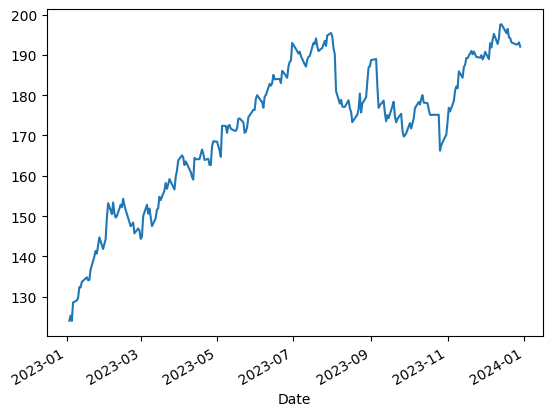

In [62]:
apple_data.Close_imputed.plot()

<Axes: xlabel='Date'>

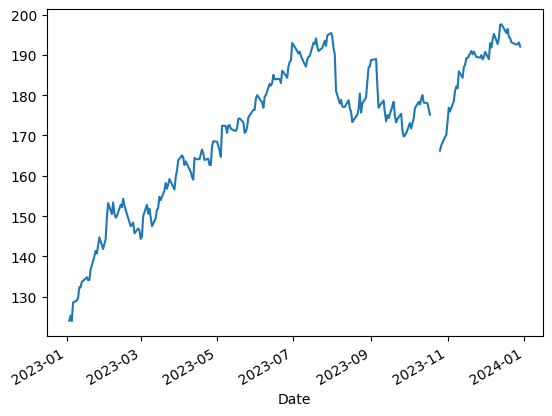

In [63]:
apple_data.Missing.plot()

<Axes: xlabel='Date'>

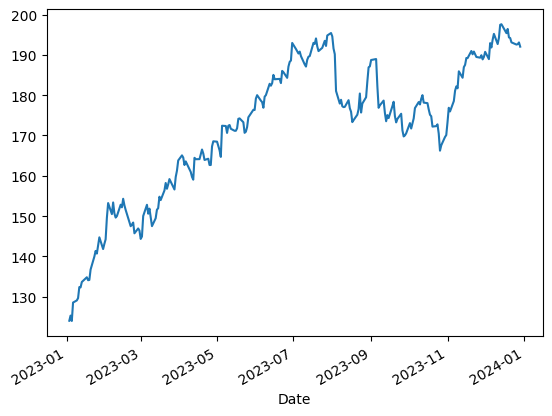

In [64]:
apple_data.Close.plot()

In [78]:
apple_data['Close_interpolated'] = apple_data['Missing'].interpolate(method='linear')

In [79]:
print(mean_squared_error(apple_data.Close_interpolated, apple_data.Close))
print(mean_squared_error(apple_data.Close_imputed, apple_data.Close))

0.09532489457237535
0.17677006430502215


Fit model in the reverse

In [95]:
apple_data['Missing'][::-1][:46]

Date
2023-12-29 00:00:00-05:00    192.024185
2023-12-28 00:00:00-05:00    193.071426
2023-12-27 00:00:00-05:00    192.642548
2023-12-26 00:00:00-05:00    192.542816
2023-12-22 00:00:00-05:00    193.091385
2023-12-21 00:00:00-05:00    194.168518
2023-12-20 00:00:00-05:00    194.318146
2023-12-19 00:00:00-05:00    196.422607
2023-12-18 00:00:00-05:00    195.375366
2023-12-15 00:00:00-05:00    197.050949
2023-12-14 00:00:00-05:00    197.589523
2023-12-13 00:00:00-05:00    197.439926
2023-12-12 00:00:00-05:00    194.198471
2023-12-11 00:00:00-05:00    192.672485
2023-12-08 00:00:00-05:00    195.195847
2023-12-07 00:00:00-05:00    193.759628
2023-12-06 00:00:00-05:00    191.814743
2023-12-05 00:00:00-05:00    192.911850
2023-12-04 00:00:00-05:00    188.932312
2023-12-01 00:00:00-05:00    190.737579
2023-11-30 00:00:00-05:00    189.450958
2023-11-29 00:00:00-05:00    188.872482
2023-11-28 00:00:00-05:00    189.899765
2023-11-27 00:00:00-05:00    189.291367
2023-11-24 00:00:00-05:00    189.47

In [100]:
# Function to fill missing values using ARIMA
def fill_missing_arima_reverse(data):
    missing_indices = np.where(data.isna())[0]
    
    # # Fit ARIMA model upto the non-missing data values
    # model = ARIMA(np.array(data.iloc[:missing_indices[0]]), order=(2, 1, 0)) 
    # model_fit = model.fit()
    
    # Predict missing values
    for i in missing_indices:
        # Update the model with the latest available data
        # model = ARIMA(np.array(data[:i].dropna()), order=(2, 1, 0))
        model = ARIMA(np.array(data.iloc[:i]), order=(2, 1, 0))
        model_fit = model.fit()
        
        # Forecast the next value
        forecast = model_fit.forecast(steps=1)
        data[i] = forecast[0]
    
    return data

# Apply the function to impute missing values
apple_data['Close_imputed_reverse'] = fill_missing_arima(apple_data['Missing'][::-1].copy())[::-1]

/var/folders/xf/nrh10nbn72g0qqwyvykmn5qh0000gp/T/ipykernel_67152/2138477307.py:18: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  data[i] = forecast[0]


In [103]:
apple_data["average_imputation"] = (apple_data.Close_imputed + apple_data.Close_imputed_reverse)/2
apple_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Missing,Close_imputed,Close_interpolated,Close_imputed_reverse,average_imputation
Date,,,,,,,,,,,,
2023-01-03 00:00:00-05:00,129.215470,129.830399,123.155395,124.048042,112117500,0.0,0.0,124.048042,124.048042,124.048042,124.048042,124.048042
2023-01-04 00:00:00-05:00,125.853175,127.608717,124.057967,125.327507,89113600,0.0,0.0,125.327507,125.327507,125.327507,125.327507,125.327507
2023-01-05 00:00:00-05:00,126.091203,126.725973,123.740574,123.998444,80962700,0.0,0.0,123.998444,123.998444,123.998444,123.998444,123.998444
2023-01-06 00:00:00-05:00,124.980357,129.225376,123.869506,128.560852,87754700,0.0,0.0,128.560852,128.560852,128.560852,128.560852,128.560852
2023-01-09 00:00:00-05:00,129.403925,132.319905,128.828663,129.086533,70790800,0.0,0.0,129.086533,129.086533,129.086533,129.086533,129.086533
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,194.667221,194.896627,192.463035,193.091385,37122800,0.0,0.0,193.091385,193.091385,193.091385,193.091385,193.091385
2023-12-26 00:00:00-05:00,193.101342,193.380606,192.323393,192.542816,28919300,0.0,0.0,192.542816,192.542816,192.542816,192.542816,192.542816
2023-12-27 00:00:00-05:00,191.984293,192.991634,190.587962,192.642548,48087700,0.0,0.0,192.642548,192.642548,192.642548,192.642548,192.642548


In [104]:
print(mean_squared_error(apple_data.Close_interpolated, apple_data.Close))
print(mean_squared_error(apple_data.Close_imputed, apple_data.Close))
print(mean_squared_error(apple_data.Close_imputed_reverse, apple_data.Close))
print(mean_squared_error(apple_data.average_imputation, apple_data.Close))

0.09532489457237535
0.17677006430502215
1.092009052926505
0.15012036867573636


<Axes: xlabel='Date'>

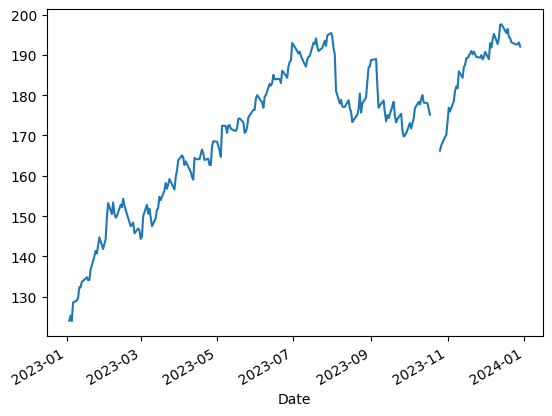

In [109]:
apple_data.Missing.plot()

<Axes: xlabel='Date'>

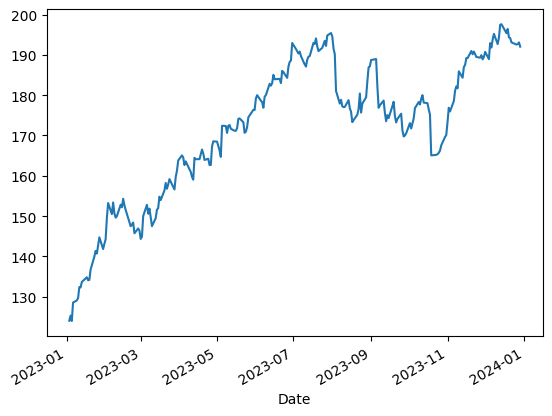

In [105]:
apple_data.Close_imputed_reverse.plot()

<Axes: xlabel='Date'>

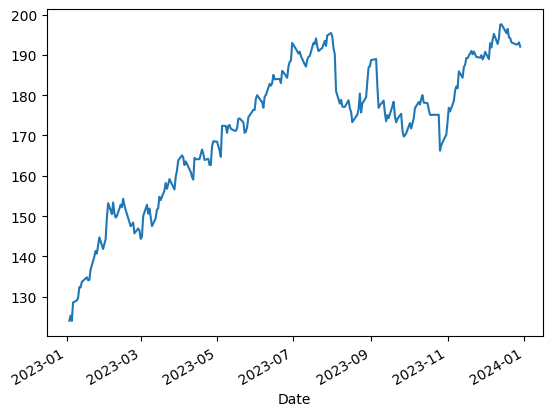

In [106]:
apple_data.Close_imputed.plot()

<Axes: xlabel='Date'>

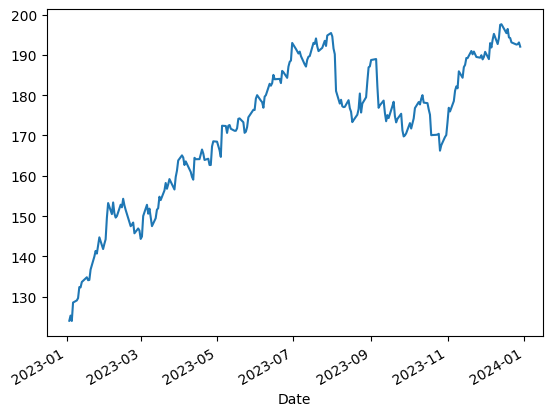

In [107]:
apple_data.average_imputation.plot()

<Axes: xlabel='Date'>

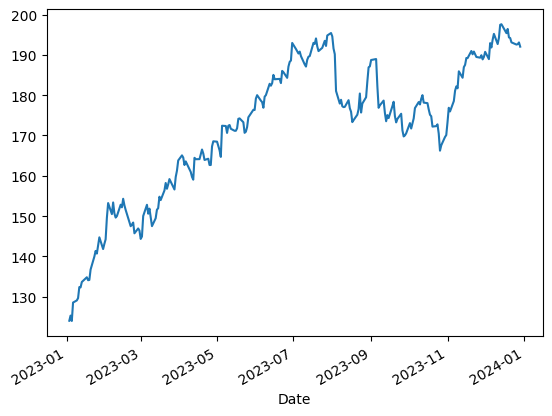

In [108]:
apple_data.Close.plot()

In [68]:
apple_data['Missing'].iloc[:200]

Date
2023-01-03 00:00:00-05:00    124.048042
2023-01-04 00:00:00-05:00    125.327507
2023-01-05 00:00:00-05:00    123.998444
2023-01-06 00:00:00-05:00    128.560852
2023-01-09 00:00:00-05:00    129.086533
                                ...    
2023-10-12 00:00:00-04:00    179.998108
2023-10-13 00:00:00-04:00    178.145416
2023-10-16 00:00:00-04:00    178.015945
2023-10-17 00:00:00-04:00    176.452118
2023-10-18 00:00:00-04:00    175.147278
Name: Missing, Length: 200, dtype: float64

In [73]:
apple_data['Missing'].iloc[205:][::-1]

Date
2023-12-29 00:00:00-05:00    192.024185
2023-12-28 00:00:00-05:00    193.071426
2023-12-27 00:00:00-05:00    192.642548
2023-12-26 00:00:00-05:00    192.542816
2023-12-22 00:00:00-05:00    193.091385
2023-12-21 00:00:00-05:00    194.168518
2023-12-20 00:00:00-05:00    194.318146
2023-12-19 00:00:00-05:00    196.422607
2023-12-18 00:00:00-05:00    195.375366
2023-12-15 00:00:00-05:00    197.050949
2023-12-14 00:00:00-05:00    197.589523
2023-12-13 00:00:00-05:00    197.439926
2023-12-12 00:00:00-05:00    194.198471
2023-12-11 00:00:00-05:00    192.672485
2023-12-08 00:00:00-05:00    195.195847
2023-12-07 00:00:00-05:00    193.759628
2023-12-06 00:00:00-05:00    191.814743
2023-12-05 00:00:00-05:00    192.911850
2023-12-04 00:00:00-05:00    188.932312
2023-12-01 00:00:00-05:00    190.737579
2023-11-30 00:00:00-05:00    189.450958
2023-11-29 00:00:00-05:00    188.872482
2023-11-28 00:00:00-05:00    189.899765
2023-11-27 00:00:00-05:00    189.291367
2023-11-24 00:00:00-05:00    189.47

In [74]:
apple_data['Missing'].iloc[205:]

Date
2023-10-26 00:00:00-04:00    166.232559
2023-10-27 00:00:00-04:00    167.557312
2023-10-30 00:00:00-04:00    169.619125
2023-10-31 00:00:00-04:00    170.097260
2023-11-01 00:00:00-04:00    173.284653
2023-11-02 00:00:00-04:00    176.870483
2023-11-03 00:00:00-04:00    175.954086
2023-11-06 00:00:00-05:00    178.523941
2023-11-07 00:00:00-05:00    181.103729
2023-11-08 00:00:00-05:00    182.169510
2023-11-09 00:00:00-05:00    181.691406
2023-11-10 00:00:00-05:00    185.910278
2023-11-13 00:00:00-05:00    184.314484
2023-11-14 00:00:00-05:00    186.947556
2023-11-15 00:00:00-05:00    187.516052
2023-11-16 00:00:00-05:00    189.211609
2023-11-17 00:00:00-05:00    189.191650
2023-11-20 00:00:00-05:00    190.947021
2023-11-21 00:00:00-05:00    190.139145
2023-11-22 00:00:00-05:00    190.807404
2023-11-24 00:00:00-05:00    189.470901
2023-11-27 00:00:00-05:00    189.291367
2023-11-28 00:00:00-05:00    189.899765
2023-11-29 00:00:00-05:00    188.872482
2023-11-30 00:00:00-05:00    189.45

In [111]:
5/252.0 *100

1.984126984126984